In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy.ndimage.filters import gaussian_filter1d

/tmp/ipykernel_88238/4012659972.py:6: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


In [2]:
def select_indices(data, indexs, models):
    df = {}
    for model in models:
        df[model] = {}
    
    for model, index in zip(models, indexs):
        values = data.iloc[:, index]
        values = values.ffill()
        df[model] = values
        
    return df

def smooth_curve(df):
    new_df = {}
    for key, value in df.items():
        new_df[key] = gaussian_filter1d(value, sigma=2)
        
    return new_df

### Empirical Study I

In [3]:
loss = pd.read_csv('curves/emp1_loss.csv')
rank = pd.read_csv('curves/emp1_rank.csv')

In [4]:
models = ['(b)', '(c)', '(a)', '(d)']
loss_df = select_indices(loss, [1,4,7,10], models)
loss_df = smooth_curve(loss_df)

rank_df = select_indices(rank, [1,4,7,10], models)
for key, value in rank_df.items():
    rank_df[key][0:25] = 512
rank_df = smooth_curve(rank_df)

In [5]:
sns.set_style("darkgrid")

/tmp/ipykernel_88238/3066630040.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100])
/tmp/ipykernel_88238/3066630040.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100])


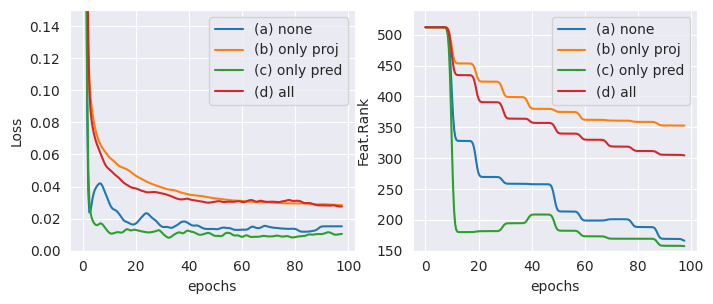

In [29]:
fig, axes = plt.subplots(1,2,figsize=(7,3))
fig.tight_layout()

ax = axes[0]
sns.lineplot(loss_df['(a)'], ax=ax, label='(a) none')
sns.lineplot(loss_df['(b)'], ax=ax, label='(b) only proj')
sns.lineplot(loss_df['(c)'], ax=ax, label='(c) only pred')
sns.lineplot(loss_df['(d)'], ax=ax, label='(d) all')
ax.set_ylim(0, 0.15)
ax.set(xlabel='epochs', ylabel='Loss')
ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100])

ax = axes[1]
sns.lineplot(rank_df['(a)'], ax=ax, label='(a) none')
sns.lineplot(rank_df['(b)'], ax=ax, label='(b) only proj')
sns.lineplot(rank_df['(c)'], ax=ax, label='(c) only pred')
sns.lineplot(rank_df['(d)'], ax=ax, label='(d) all')
ax.set(xlabel='epochs', ylabel='Feat.Rank')
ax.set_ylim(150, 540)
ax.set_xticklabels([0, 0, 20, 40, 60, 80, 100])

#handles, labels = ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper center')
#ax.set_xticklabels([0.0, 0.0, 0.25, 0.5, 0.75, 1.0])

plt.savefig('summary.png', bbox_inches='tight')

In [23]:
plt.savefig('summary.png', bbox_inches='tight')

<Figure size 640x480 with 0 Axes>